#Carregando diretório de imagem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = '/content/drive/MyDrive/Alura/Deep Learning/TensorFlow/uvas'

In [ ]:
import pathlib
data_dir = pathlib.Path(url)
len(list(data_dir.glob('*/*.JPG')))

1600

###Conferindo todas as pastas

In [ ]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir]
print(subfolders)

['BlackMeasles', 'LeafBlight', 'HealthyGrapes', 'BlackRot']


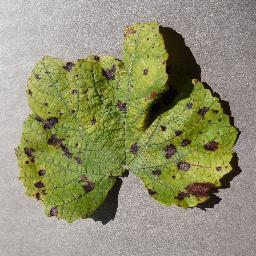

In [ ]:
import PIL

leafblight = list(data_dir.glob('LeafBlight/*'))
PIL.Image.open(str(leafblight[0]))

#Explorando e visualizando dados

In [ ]:
import numpy as np

#Verificando quantas imagens cada classe tem
for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.JPG'))
  print(f'Clase {subfolder} tem {len(images)} imagens')

  #dimensao das imagens
  if images:
    img = PIL.Image.open(str(images[0])) #primeira imagem de cada pasta
    img_array = np.array(img)
    print(f'Dimensão da imagem  em {subfolder}: {img_array.shape}')

Clase BlackMeasles tem 400 imagens
Dimensão da imagem  em BlackMeasles: (256, 256, 3)
Clase LeafBlight tem 400 imagens
Dimensão da imagem  em LeafBlight: (256, 256, 3)
Clase HealthyGrapes tem 400 imagens
Dimensão da imagem  em HealthyGrapes: (256, 256, 3)
Clase BlackRot tem 400 imagens
Dimensão da imagem  em BlackRot: (256, 256, 3)


- Os primeiros dois numeros são as dimensões em pixels da imagem, o terceiro número é o número de canais da imagem.
- Três canais de cores é como se fossem 3 matrizes para formar imagens (coloridas)

##Caregamento das imagens no tensorflow em batchs

- Não estamos carregando o dataset e sim passando as informações de como carregar o dataset

In [ ]:
import tensorflow as tf

batch_size = 64
altura = 255
largura = 256

treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, #testesize
    subset='training',
    seed=568,
    image_size=(altura, largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [ ]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, #testesize
    subset='validation',
    seed=568,
    image_size=(altura, largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


#Estrutura e treinamento da rede neural

In [ ]:
#Definindo seed para reprozir resultados parecidos
tf.random.set_seed(42)

modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(255, 256, 3)),
    tf.keras.layers.Rescaling(1./255), #reescalando
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(
  optimizer = tf.keras.optimizers.Adam(),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

###Utilizando a GPU do colab

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 540s 27s/step - accuracy: 0.2443 - loss: 89.6334 - val_accuracy: 0.3281 - val_loss: 23.9950
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.4062 - loss: 20.1963 - val_accuracy: 0.4594 - val_loss: 5.4263
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - accuracy: 0.5283 - loss: 4.2198 - val_accuracy: 0.5312 - val_loss: 3.7211
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - accuracy: 0.6201 - loss: 2.5202 - val_accuracy: 0.7344 - val_loss: 1.3182
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.7060 - loss: 1.4325 - val_accuracy: 0.6000 - val_loss: 2.7766
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - accuracy: 0.6798 - loss: 1.6551 - val_accuracy: 0.6969 - val_loss: 1.3118
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - accuracy: 0.7992 - loss: 0.7670 - val_accuracy: 0.6844 - val_loss: 1.1912
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.7388 - loss: 0.9418 - val_accuracy:

In [ ]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 255, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 195840)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,067,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,204,494 (286.88 MB)

 Trainable params: 25,068,164 (95.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,136,330 (191.25 MB)

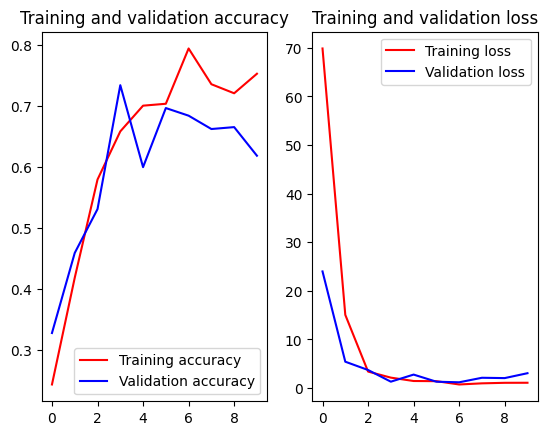

In [ ]:
import matplotlib.pyplot as plt

def plota_resultados(history, epocas):
  acc = history.history['accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  val_acc = history.history['val_accuracy']

  intervalo_epocas = range(epocas)

  plt.subplot(1,2,1)
  plt.plot(intervalo_epocas, acc, 'r', label='Training accuracy')
  plt.plot(intervalo_epocas, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc='lower right')

  plt.subplot(1,2,2)
  plt.plot(intervalo_epocas, loss, 'r', label='Training loss')
  plt.plot(intervalo_epocas, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend(loc='upper right')

  plt.show()

plota_resultados(history, epocas)

#Adicionando camadas convolucionais
###Estrututando uma rede convolucional
- Adicionando camadas após o processo de reecaling a antes do flatten
- **tf.keras.layers.Conv2D:** é uma camada usada em redes neurais convolucionais (CNNs) para realizar operações de convolução em dados bidimensionais, como imagens. Essa camada aplica filtros (ou kernels) deslizantes sobre a entrada, que podem ser uma imagem ou a saída de outra camada convolucional, para extrair características relevantes, como bordas, texturas, e padrões complexos
- **tf.keras.layers.Maxpooling2D:** funciona aplicando um filtro sobre a imagem de entrada e, em cada região filtrada, seleciona o valor máximo. Isso ajuda a reduzir a quantidade de parâmetros, aumentar a eficiência computacional e minimizar o risco de overfitting, mantendo as informações mais relevantes da imagem.

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(255, 256, 3)),
    tf.keras.layers.Rescaling(1./255),#reescalando
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(
  optimizer = tf.keras.optimizers.Adam(),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

In [ ]:
epocas = 10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 300ms/step - accuracy: 0.2634 - loss: 4.2562 - val_accuracy: 0.2562 - val_loss: 1.2645
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 311ms/step - accuracy: 0.4006 - loss: 1.1462 - val_accuracy: 0.7219 - val_loss: 0.7339
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.7899 - loss: 0.5674 - val_accuracy: 0.8719 - val_loss: 0.3974
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.9004 - loss: 0.2965 - val_accuracy: 0.8656 - val_loss: 0.3590
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - accuracy: 0.9219 - loss: 0.2388 - val_accuracy: 0.8844 - val_loss: 0.3107
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.9545 - loss: 0.1354 - val_accuracy: 0.8781 - val_loss: 0.3305
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 288ms/step - accuracy: 0.9710 - loss: 0.0830 - val_accuracy: 0.9250 - val_loss: 0.2120
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 308ms/step - accuracy: 0.9937 - loss: 0.0400 - val_accuracy

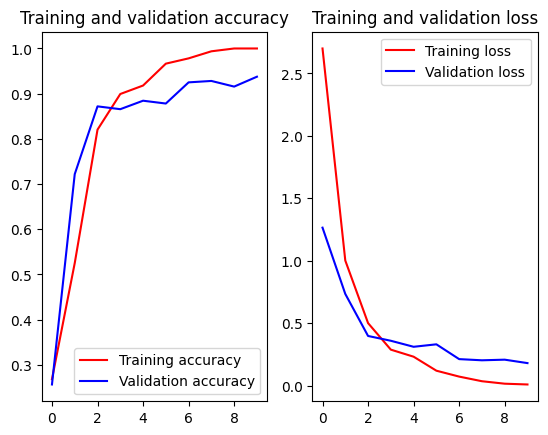

In [ ]:
plota_resultados(history, epocas)

- Modelo muito ajustado aos dados de treinamento, o que pode dificultar na generalização, precisamos de acrescentar um critério de parada no treinamento para que o modelo se adeque menos aos dados de treinamento

In [ ]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 255, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 253, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

##Early Stopping


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.93): #quando a acuracia for maior que 93% o modelo para
      print("\n Alcançamos 93% de acurácia. Parando treinamento")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(255, 256, 3)),
    tf.keras.layers.Rescaling(1./255),#reescalando
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(
  optimizer = tf.keras.optimizers.Adam(),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

###Fit do modelo com o Callback definido

In [ ]:
epocas = 10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
    callbacks=[callbacks]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.2595 - loss: 6.0347 - val_accuracy: 0.6469 - val_loss: 1.0544
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 281ms/step - accuracy: 0.7041 - loss: 0.8304 - val_accuracy: 0.8813 - val_loss: 0.3395
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - accuracy: 0.8928 - loss: 0.3365 - val_accuracy: 0.8938 - val_loss: 0.2647
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - accuracy: 0.9246 - loss: 0.2176 - val_accuracy: 0.9094 - val_loss: 0.2205
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.9482 - loss: 0.1353
 Alcançamos 93% de acurácia. Parando treinamento
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.9487 - loss: 0.1347 - val_accuracy: 0.9031 - val_loss: 0.2776


In [ ]:
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 255, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 253, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 126, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 124, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

#Aumentando a diversidade do Dataset

###Realizando treinamento cru da rede antes do Data augmentation

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(255, 256, 3)),
    tf.keras.layers.Rescaling(1./255),#reescalando
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(
  optimizer = tf.keras.optimizers.Adam(),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

In [ ]:
epocas = 50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - accuracy: 0.9527 - loss: 0.1352 - val_accuracy: 0.9250 - val_loss: 0.2078
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.9753 - loss: 0.0872 - val_accuracy: 0.9281 - val_loss: 0.1853
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - accuracy: 0.9920 - loss: 0.0442 - val_accuracy: 0.9406 - val_loss: 0.1638
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.9985 - loss: 0.0260 - val_accuracy: 0.9500 - val_loss: 0.1512
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 0.9980 - loss: 0.0174 - val_accuracy: 0.9281 - val_loss: 0.1861
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 324ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.9438 - val_loss: 0.1703
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 284ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.9469 - val_loss: 0.1636
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accura

- Treinamento de estabiliza e validação também gerando overfiting
- Agora temos que aplicar a técnica para auemntar a nossa base de dados para adicionar mais variabilidades no nossos dados

##Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05)
])

###Adicionando Data augmentation a estrutura da rede

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(255, 256, 3)),
    #data augmentatiom
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),#reescalando
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(
  optimizer = tf.keras.optimizers.Adam(),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

In [ ]:
epocas = 50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.2878 - loss: 5.0398 - val_accuracy: 0.5156 - val_loss: 1.0303
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - accuracy: 0.6580 - loss: 0.7992 - val_accuracy: 0.7719 - val_loss: 0.5660
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.8586 - loss: 0.3984 - val_accuracy: 0.8406 - val_loss: 0.4795
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 325ms/step - accuracy: 0.8751 - loss: 0.3128 - val_accuracy: 0.8531 - val_loss: 0.3981
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.8895 - loss: 0.2959 - val_accuracy: 0.8344 - val_loss: 0.6281
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 0.9514 - loss: 0.1595 - val_accuracy: 0.8813 - val_loss: 0.4584
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.9384 - loss: 0.1580 - val_accuracy: 0.9000 - val_loss: 0.3289
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.9379 - loss: 0.1672 - val_accuracy: 0

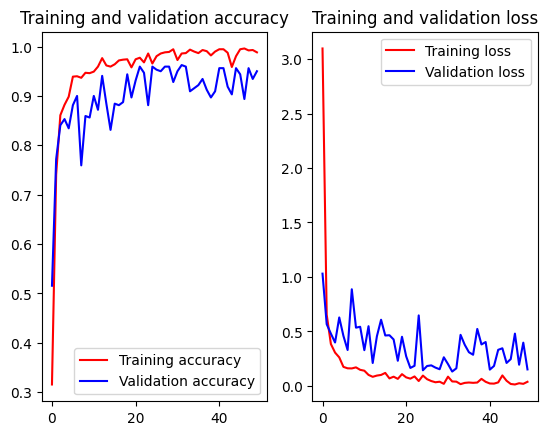

In [ ]:
plota_resultados(history, epocas)

- Modelo está um pouco instável nos dados de validação, está bom mas pode ser melhorado

In [ ]:
modelo.save('modelo_apos_aumento.keras')

##Usando modelos pré treinados


- O ImageNet é um grande banco de dados de imagens organizado de acordo com a hierarquia de conceitos do WordNet. No contexto do TensorFlow, ele é utilizado principalmente para treinar e avaliar modelos de deep learning, especialmente em tarefas de classificação de imagens.
- O TensorFlow oferece acesso a esse modelo treinado através de API.
- Esses modelos foram treinados com milhões de imagens do ImageNet.

In [ ]:
input_shape = (255, 256, 3)
modelo_base = tf.keras.applications.InceptionV3(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet'
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
#Para não treinar o modelo
modelo_base.treinable = False
modelo_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 255, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 127, 127, 32)   │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 127, 127, 32)   │             96 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 127, 127, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 125, 125, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 125, 125, 32)   │             96 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 125, 125, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 125, 125, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 125, 125, 64)   │            192 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 125, 125, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 62, 62, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 62, 62, 80)     │            240 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 62, 62, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 60, 60, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 60, 60, 192)    │            576 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

#Transfere Learning

##Conectando esse modelo treinado para treinar com o nosso caso das folhas

In [ ]:
#rescalando os dados
rescale = tf.keras.layers.Rescaling(1./255)
#retreinando
treino = treino.map(lambda x,y: (rescale(x),y))
validacao = validacao.map(lambda x,y: (rescale(x),y))

###Travando o inceptionV3
- precisamos travar a última camada do inceptionV3
- poederiamos escolher as últimas camadas, como a mixed9 ou mixed8, mas vamos travar a mixed7 para que o modelo não fique muito grande

In [ ]:
ultima_camada = modelo_base.get_layer('mixed7')
print('ultima_camada', ultima_camada.output.shape)
ultima_saida = ultima_camada.output

ultima_camada (None, 14, 14, 768)


- Ultima camada com esse tamanho
- Precisamos passar a última saída desse modelo para conectar  ao modelo que iremos construir

##Construindo o modelo
- Pegando como entrada o modelo_base que é inceptionV3 e o modelo de saída é a nosa sequência de camadas que vamos criar

In [ ]:
x = tf.keras.layers.Flatten()(ultima_saida)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(4, activation='softmax')(x)

modelo = tf.keras.models.Model(inputs=modelo_base.input, outputs=x)

In [ ]:
modelo.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 255, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 127, 127, 32)   │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 127, 127, 32)   │             96 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 127, 127, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 125, 125, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 125, 125, 32)   │             96 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 125, 125, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 125, 125, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 125, 125, 64)   │            192 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 125, 125, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 62, 62, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 62, 62, 80)     │            240 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 62, 62, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 60, 60, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 60, 60, 192)    │            576 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 163,121,060 (622.26 MB)

 Trainable params: 163,102,244 (622.19 MB)

 Non-trainable params: 18,816 (73.50 KB)

- agora temos uma camada densa de saida com 4 neuronios
- temos a camada densa que adicionamos
- temos a camada do droput

- Isso significa que nós conectamos esse pequeno modelo com parâmetros treináveis ao final do modelo inceptionV3

In [ ]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
epocas = 20

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 747ms/step - accuracy: 0.5158 - loss: 5.3374 - val_accuracy: 0.2781 - val_loss: 2931.4858
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 569ms/step - accuracy: 0.9614 - loss: 0.2257 - val_accuracy: 0.2781 - val_loss: 11657.9941
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 577ms/step - accuracy: 0.9883 - loss: 0.0387 - val_accuracy: 0.2531 - val_loss: 1250.7501
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 574ms/step - accuracy: 0.9960 - loss: 0.0162 - val_accuracy: 0.3844 - val_loss: 90.6774
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 558ms/step - accuracy: 0.9959 - loss: 0.0184 - val_accuracy: 0.6844 - val_loss: 509.9882
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 565ms/step - accuracy: 0.9941 - loss: 0.0391 - val_accuracy: 0.7312 - val_loss: 102.9158
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 564ms/step - accuracy: 0.9872 - loss: 0.0410 - val_accuracy: 0.6062 - val_loss: 392.6028
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 564ms/step - accuracy: 0.9933 - loss: 

#Salvando modelo
- Salvando o modelo normal




In [ ]:
modelo.save('modelo_transeferencia_de_aprendizado.h5')

- Salvando o modelo sem os otimizadores (modelo fica menor e não demora tanto para ser baixado)

In [ ]:
modelo.save('modelo_final_transeferencia_de_aprendizado.h5', include_optimizer=False)

- Salvando modelo incluindo apenas os pesos de treinamento. (Para isso precisamos saber reescrever a estreutura do modelo)

In [ ]:
modelo.save_weights('pesos.weights.h5')

- Converter o modelo para o formato tensor.lite

###Quantização:
A quantização é o processo de reduzir a precisão numérica dos parâmetros de um modelo, como pesos e ativações, de números de ponto flutuante de 32 bits (float32) para representações de menor precisão, como 16 bits ou até mesmo como inteiros de 8 bits (int8). Essa redução na precisão numérica diminui significativamente o tamanho do modelo e acelera os cálculos durante a inferência, tornando-o mais leve e rápido.

In [ ]:
converter =  tf.lite.TFLiteConverter.from_keras_model(modelo)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
modelo_tflite_quantizado = converter.convert()

Saved artifact at '/tmp/tmptng0ix8g'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 255, 256, 3), dtype=tf.float32, name='keras_tensor_46')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  133088804359504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133088804369008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133088804372000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133088804361616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133088803120832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133088803126640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133088803119424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133088803120128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133088803114320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133088803115376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13308880412

In [ ]:
with open('modelo_tflite_quantizado.tflite', 'wb') as f:
  f.write(modelo_tflite_quantizado)